In [1]:
import numpy as np
import pandas as pd

#### The goal is to build a machine learning model that can classify the credit score of a person given their credit-related information.

In [2]:
df = pd.read_csv(r"E:\Projects Datas\credit_score.csv")
df=df.drop(columns=["ID", "Customer_ID", "Name", "SSN","Type_of_Loan", "Credit_History_Age"])
df.head()

C:\Users\Nithin\AppData\Local\Temp\ipykernel_21824\2357429462.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"E:\Projects Datas\credit_score.csv")


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.isnull().mean()*100

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [7]:
df.Age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [8]:
df["Age"]=df["Age"].str.replace("_","")
df["Age"]=df["Age"].astype (int)

In [9]:
df["Occupation"]=df["Occupation"].replace("_____________", np.nan)

In [10]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_", "")
df["Annual_Income"]=df["Annual_Income"].astype(float)

In [11]:
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"]=df["Num_of_Loan"].astype(int)

In [12]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype(float)

In [13]:
df["Credit_Score"]=df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0,1,2])

In [14]:
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("_","")
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)

In [15]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("! @9#%8", np.nan)

In [16]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","")
df["Amount invested_monthly"]=df["Amount_invested_monthly"].astype(float)

In [17]:
df["Payment_of_Min_Amount"]=df[ "Payment_of_Min_Amount"].replace("NM", "No")
df["Payment_of_Min_Amount"]=df[ "Payment_of_Min_Amount"].replace(["Yes", "No"], [1,0])

In [18]:
df["Outstanding_Debt"]= df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype(float)

In [19]:
df["Credit_Mix"]=df["Credit_Mix"].replace("_", np.nan)
df["Credit_Mix"]=df["Credit_Mix"].replace(["Standard", 'Good', "Bad"], [1,2,0])

In [20]:
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].replace("_", np.nan)
df["Changed Credit_Limit"]=df["Changed_Credit_Limit"].astype(float)

In [21]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Amount invested_monthly,Changed Credit_Limit
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,809.98,26.822620,0,49.574949,80.41529543900253,High_spent_Small_value_payments,312.494089,2,80.415295,11.27
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,809.98,31.944960,0,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,2,118.280222,11.27
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,809.98,28.609352,0,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.209863,2,81.699521,NaN
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,809.98,31.377862,0,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.451310,2,199.458074,6.27
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,809.98,24.797347,0,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.489231,2,41.420153,11.27


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [23]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
Amount invested_monthly      4479
Changed Credit_Limit         2091
dtype: int64

In [24]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [25]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Amount invested_monthly     0
Changed Credit_Limit        0
dtype: int64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

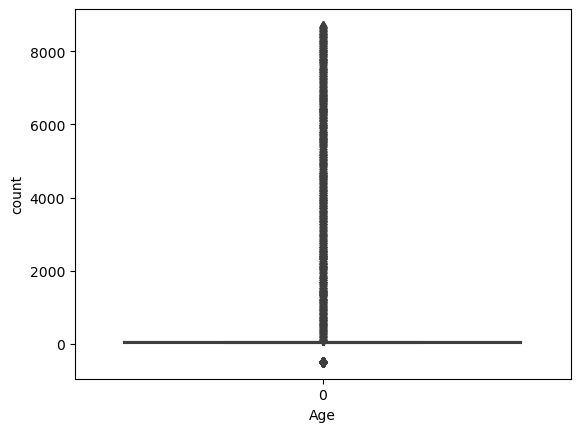

In [27]:
sns.boxplot(data = df.Age)
plt.xlabel("Age")
plt.ylabel('count')
plt.show()

###### removing outliers  from age since all  other columns  values are  relevant

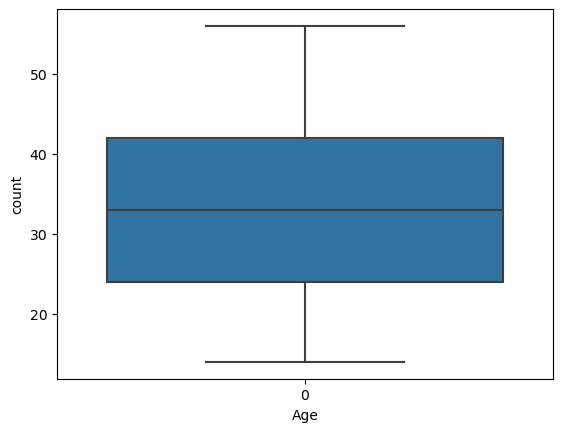

In [28]:
col_names=["Age"]
Q1= df.Age.quantile (0.25)
Q3= df.Age.quantile (0.75)
IQR = Q3 - Q1
data=df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]
sns.boxplot(data = data.Age)
plt.xlabel("Age")
plt.ylabel('count')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [30]:
df["Month"]=le.fit_transform(df["Month"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Payment_Behaviour"] = le.fit_transform(df["Payment_Behaviour"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [32]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Amount invested_monthly,Changed Credit_Limit
0,3,23,12,19114.12,1824.843333,3,4,3,4,3,...,809.98,26.822620,0,49.574949,80.41529543900253,3,312.494089,2,80.415295,11.27
1,2,23,12,19114.12,1824.843333,3,4,3,4,-1,...,809.98,31.944960,0,49.574949,118.28022162236736,4,284.629162,2,118.280222,11.27
2,6,-500,12,19114.12,1824.843333,3,4,3,4,3,...,809.98,28.609352,0,49.574949,81.699521264648,5,331.209863,2,81.699521,11.27
3,0,23,12,19114.12,1824.843333,3,4,3,4,5,...,809.98,31.377862,0,49.574949,199.4580743910713,6,223.451310,2,199.458074,6.27
4,7,23,12,19114.12,1824.843333,3,4,3,4,6,...,809.98,24.797347,0,49.574949,41.420153086217326,2,341.489231,2,41.420153,11.27


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Credit Score') ):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.275594
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Num_Credit_Inquiries  0.979793
12                Credit_Mix  0.321474
13          Outstanding_Debt  0.396141
14  Credit_Utilization_Ratio  0.024506
15     Payment_of_Min_Amount  0.476749
16       Total_EMI_per_month  0.972258
17         Payment_Behaviour  0.256136
18           Monthly_Balance  1.000217
19              Credit_Score  0.366158
20   Amount invested_monthly  0.911321
21      Changed Credit_Limit  0.299307


###### Selecting the features using VIF. VIF should be less  than 5. Here, all features have VIF value less than  5, So we will select all the features.

In [35]:
X=df.drop(columns=["Credit_Score"])
y=df["Credit_Score"]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=15)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred)

0.6189

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
dt.fit(x_train,y_train) 
y_pred= dt.predict(x_test)
accuracy_score (y_test,y_pred)

0.6924

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier() 
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score (y_test,y_pred)

0.79415

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      5861
           1       0.81      0.81      0.81     10581
           2       0.75      0.73      0.74      3558

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000

